# 第一部分：特征工程

## 第1课：特征缩放

### 1.1 为什么需要特征缩放？

特征缩放是机器学习预处理中的重要步骤。不同特征的数值范围可能差异很大，这会导致：

1. **距离计算偏差**：在KNN、K-Means等基于距离的算法中，数值大的特征会主导距离计算
2. **收敛速度慢**：在使用梯度下降的算法中，不同尺度的特征会导致优化过程缓慢
3. **正则化不均衡**：L1/L2正则化对不同尺度的特征惩罚不同

### 1.2 StandardScaler（标准化）

标准化将特征转换为均值为0，标准差为1的分布。

原始数据统计：
       alcohol  malic_acid     ash  alcalinity_of_ash  magnesium  \
count   178.00      178.00  178.00             178.00     178.00   
mean     13.00        2.34    2.37              19.49      99.74   
std       0.81        1.12    0.27               3.34      14.28   
min      11.03        0.74    1.36              10.60      70.00   
25%      12.36        1.60    2.21              17.20      88.00   
50%      13.05        1.87    2.36              19.50      98.00   
75%      13.68        3.08    2.56              21.50     107.00   
max      14.83        5.80    3.23              30.00     162.00   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count         178.00      178.00                178.00           178.00   
mean            2.30        2.03                  0.36             1.59   
std             0.63        1.00                  0.12             0.57   
min             0.98        0.34                  0.13             0.41   
25% 

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/1280487431.py:47: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/1280487431.py:47: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/1280487431.py:47: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/1280487431.py:47: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/1280487431.py:47: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7

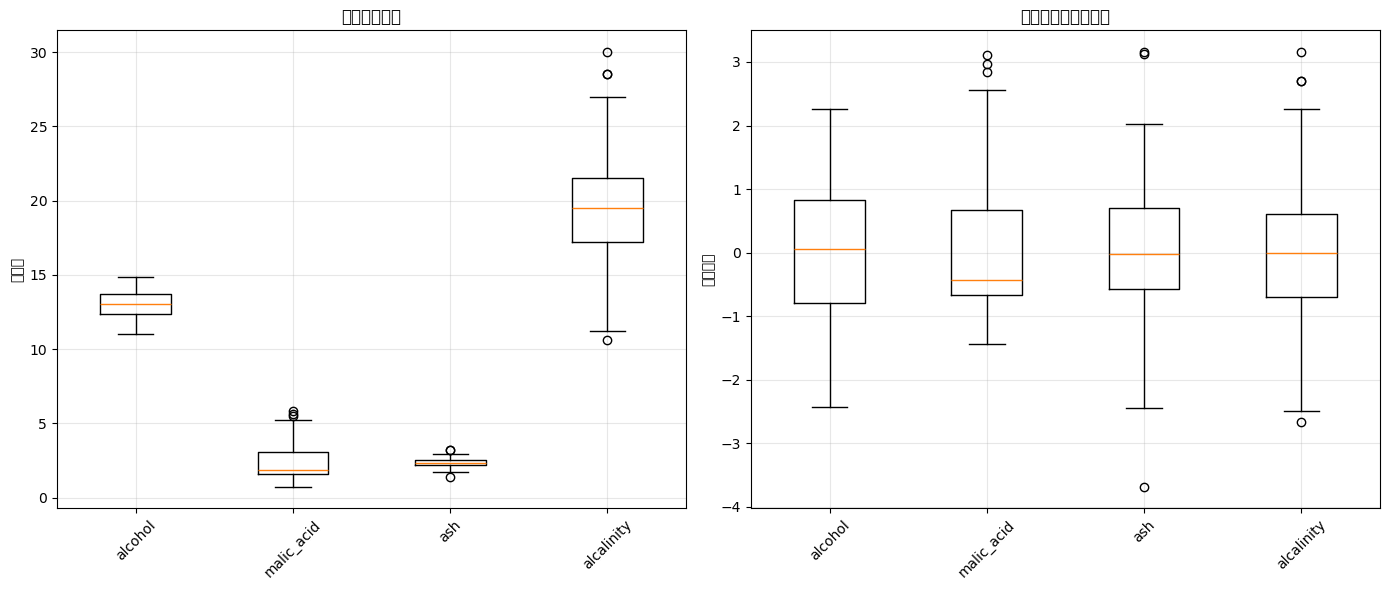


缩放参数：
均值: [13.    2.34  2.37 19.49]
标准差: [0.81 1.11 0.27 3.33]


In [22]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 加载葡萄酒数据集
wine = datasets.load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# 查看原始数据的统计信息
df = pd.DataFrame(X, columns=feature_names)
print("原始数据统计：")
print(df.describe().round(2))
print("\n原始数据前5行：")
print(df.head())

# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 查看标准化后的数据
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
print("\n标准化后的数据统计：")
print(df_scaled.describe().round(2))

# 可视化对比
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 原始数据箱线图
ax1.boxplot(X[:, :4])  # 只显示前4个特征
ax1.set_xticklabels(['alcohol', 'malic_acid', 'ash', 'alcalinity'], rotation=45)
ax1.set_title('原始数据分布')
ax1.set_ylabel('特征值')
ax1.grid(True, alpha=0.3)

# 标准化后的数据箱线图
ax2.boxplot(X_scaled[:, :4])
ax2.set_xticklabels(['alcohol', 'malic_acid', 'ash', 'alcalinity'], rotation=45)
ax2.set_title('标准化后的数据分布')
ax2.set_ylabel('标准化值')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 查看缩放参数
print("\n缩放参数：")
print(f"均值: {scaler.mean_[:4].round(2)}")
print(f"标准差: {scaler.scale_[:4].round(2)}")

### 1.3 MinMaxScaler（归一化）

归一化将特征缩放到[0,1]区间。

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/1661121468.py:39: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/1661121468.py:39: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/1661121468.py:39: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/1661121468.py:39: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/1661121468.py:39: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7

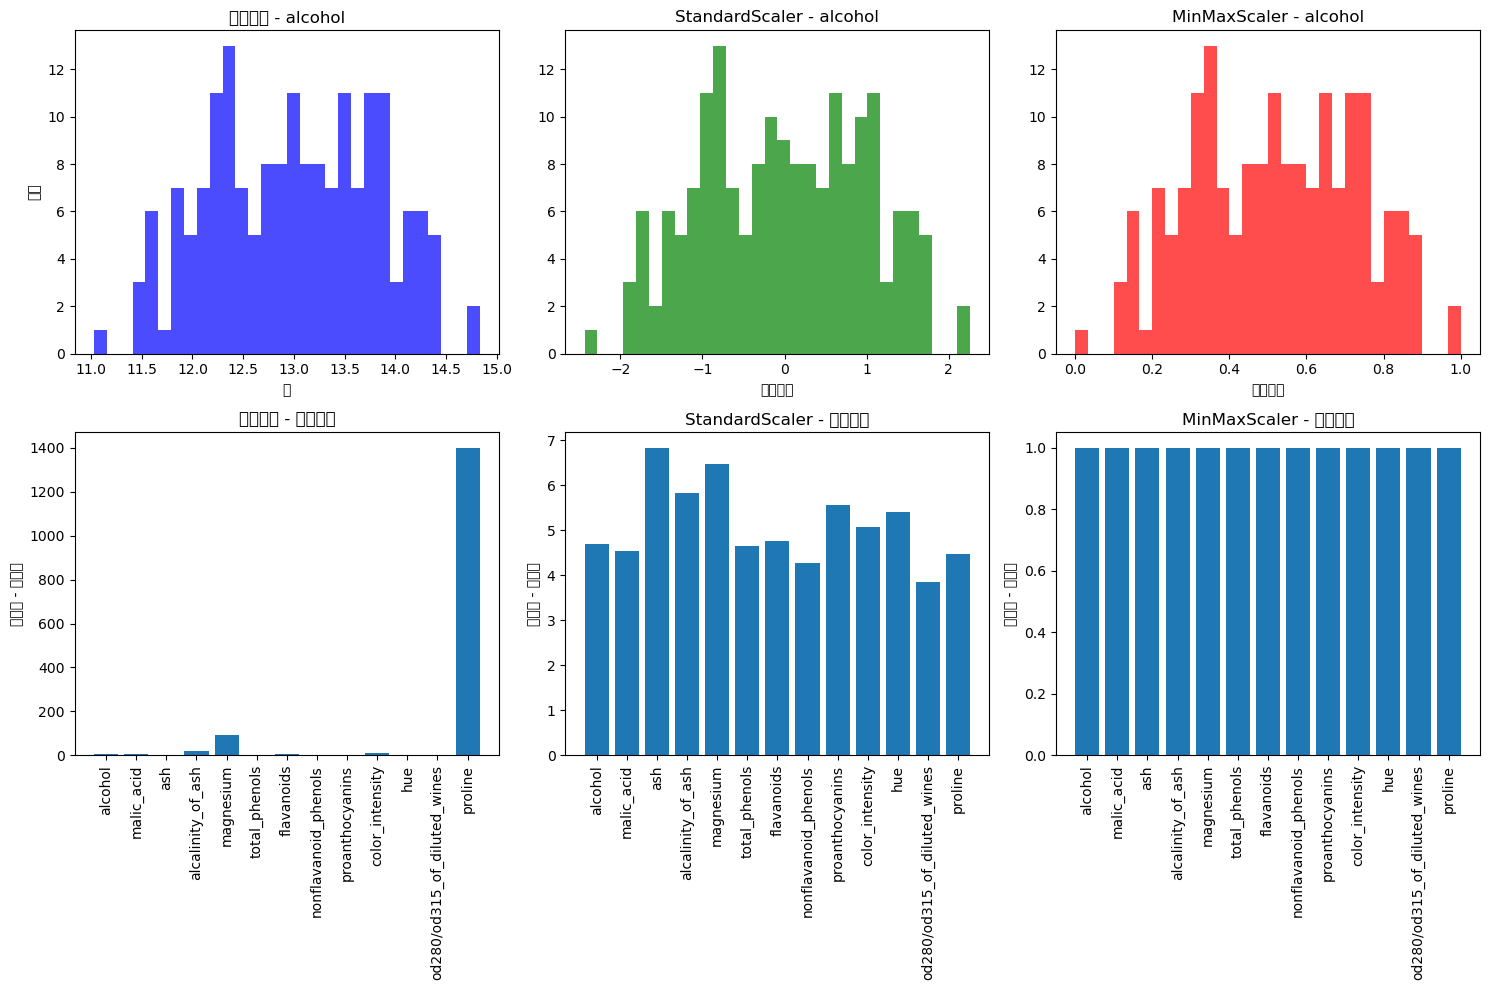

各种缩放方法的数据范围：
原始数据范围: [0.13, 1680.00]
StandardScaler范围: [-3.68, 4.37]
MinMaxScaler范围: [0.00, 1.00]


In [23]:
from sklearn.preprocessing import MinMaxScaler

# 使用MinMaxScaler
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)

# 对比不同缩放方法
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 选择一个特征进行详细对比
feature_idx = 0  # alcohol特征

# 第一行：分布直方图
axes[0, 0].hist(X[:, feature_idx], bins=30, alpha=0.7, color='blue')
axes[0, 0].set_title(f'原始数据 - {feature_names[feature_idx]}')
axes[0, 0].set_xlabel('值')
axes[0, 0].set_ylabel('频数')

axes[0, 1].hist(X_scaled[:, feature_idx], bins=30, alpha=0.7, color='green')
axes[0, 1].set_title(f'StandardScaler - {feature_names[feature_idx]}')
axes[0, 1].set_xlabel('标准化值')

axes[0, 2].hist(X_minmax[:, feature_idx], bins=30, alpha=0.7, color='red')
axes[0, 2].set_title(f'MinMaxScaler - {feature_names[feature_idx]}')
axes[0, 2].set_xlabel('归一化值')

# 第二行：所有特征的范围对比
data_types = ['原始数据', 'StandardScaler', 'MinMaxScaler']
data_list = [X, X_scaled, X_minmax]

for i, (data_type, data) in enumerate(zip(data_types, data_list)):
    axes[1, i].bar(range(len(feature_names)), 
                   data.max(axis=0) - data.min(axis=0))
    axes[1, i].set_xticks(range(len(feature_names)))
    axes[1, i].set_xticklabels(feature_names, rotation=90)
    axes[1, i].set_title(f'{data_type} - 特征范围')
    axes[1, i].set_ylabel('最大值 - 最小值')

plt.tight_layout()
plt.show()

# 打印缩放后的范围
print("各种缩放方法的数据范围：")
print(f"原始数据范围: [{X.min():.2f}, {X.max():.2f}]")
print(f"StandardScaler范围: [{X_scaled.min():.2f}, {X_scaled.max():.2f}]")
print(f"MinMaxScaler范围: [{X_minmax.min():.2f}, {X_minmax.max():.2f}]")

### 1.4 RobustScaler（稳健缩放）

RobustScaler使用中位数和四分位数，对异常值不敏感。

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/767673094.py:39: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/767673094.py:39: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/767673094.py:39: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/767673094.py:39: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/767673094.py:39: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p

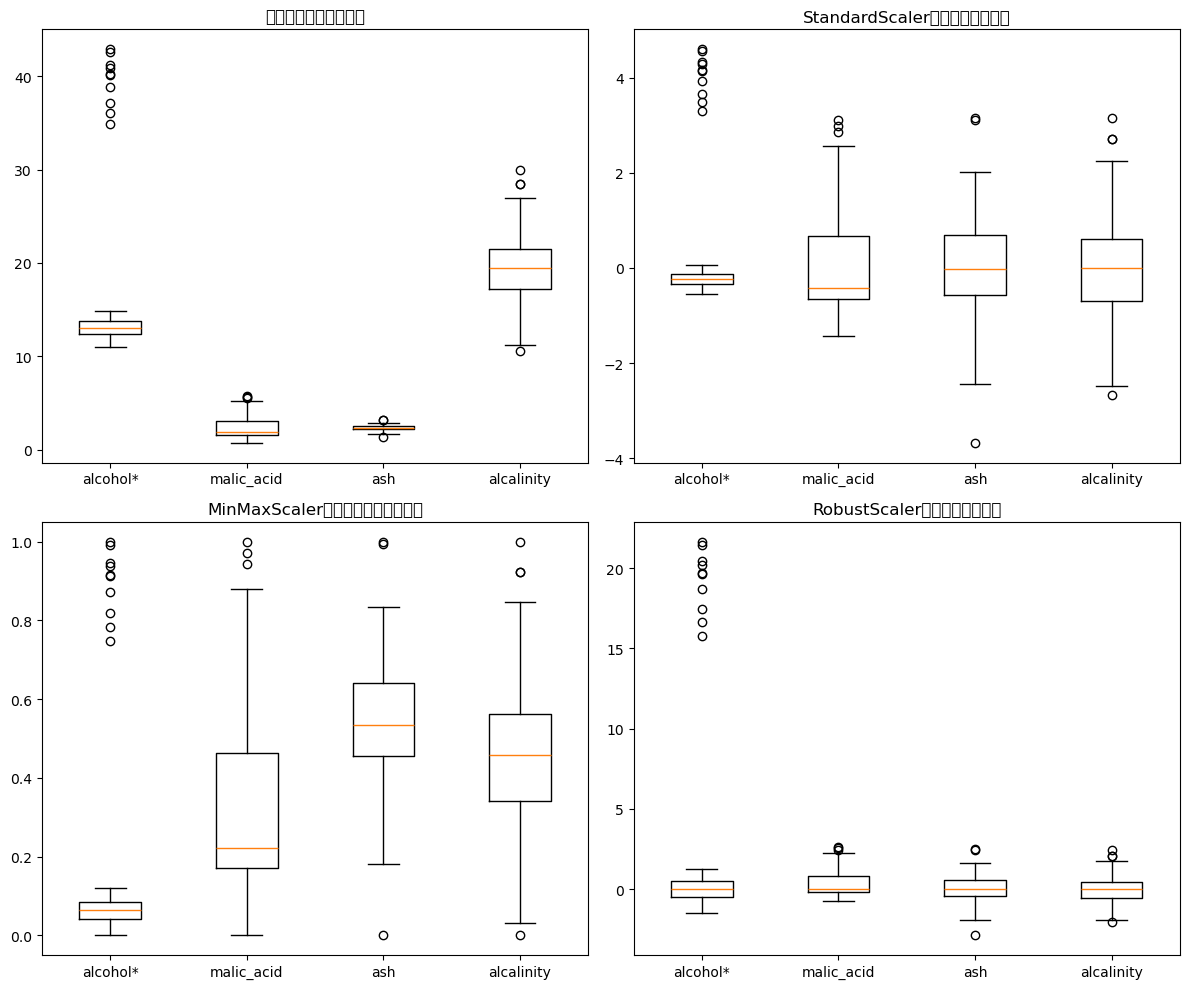

In [24]:
from sklearn.preprocessing import RobustScaler

# 创建包含异常值的数据
np.random.seed(42)
X_with_outliers = X.copy()
# 在第一个特征中添加一些异常值
outlier_indices = np.random.choice(len(X), 10, replace=False)
X_with_outliers[outlier_indices, 0] = X_with_outliers[outlier_indices, 0] * 3

# 应用不同的缩放方法
robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X_with_outliers)
X_standard_outliers = StandardScaler().fit_transform(X_with_outliers)
X_minmax_outliers = MinMaxScaler().fit_transform(X_with_outliers)

# 可视化比较
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 原始数据（带异常值）
axes[0, 0].boxplot(X_with_outliers[:, :4])
axes[0, 0].set_title('原始数据（含异常值）')
axes[0, 0].set_xticklabels(['alcohol*', 'malic_acid', 'ash', 'alcalinity'])

# StandardScaler
axes[0, 1].boxplot(X_standard_outliers[:, :4])
axes[0, 1].set_title('StandardScaler（受异常值影响）')
axes[0, 1].set_xticklabels(['alcohol*', 'malic_acid', 'ash', 'alcalinity'])

# MinMaxScaler
axes[1, 0].boxplot(X_minmax_outliers[:, :4])
axes[1, 0].set_title('MinMaxScaler（受异常值影响严重）')
axes[1, 0].set_xticklabels(['alcohol*', 'malic_acid', 'ash', 'alcalinity'])

# RobustScaler
axes[1, 1].boxplot(X_robust[:, :4])
axes[1, 1].set_title('RobustScaler（对异常值稳健）')
axes[1, 1].set_xticklabels(['alcohol*', 'malic_acid', 'ash', 'alcalinity'])

plt.tight_layout()
plt.show()

1.5 实践：缩放对KNN性能的影响

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaV

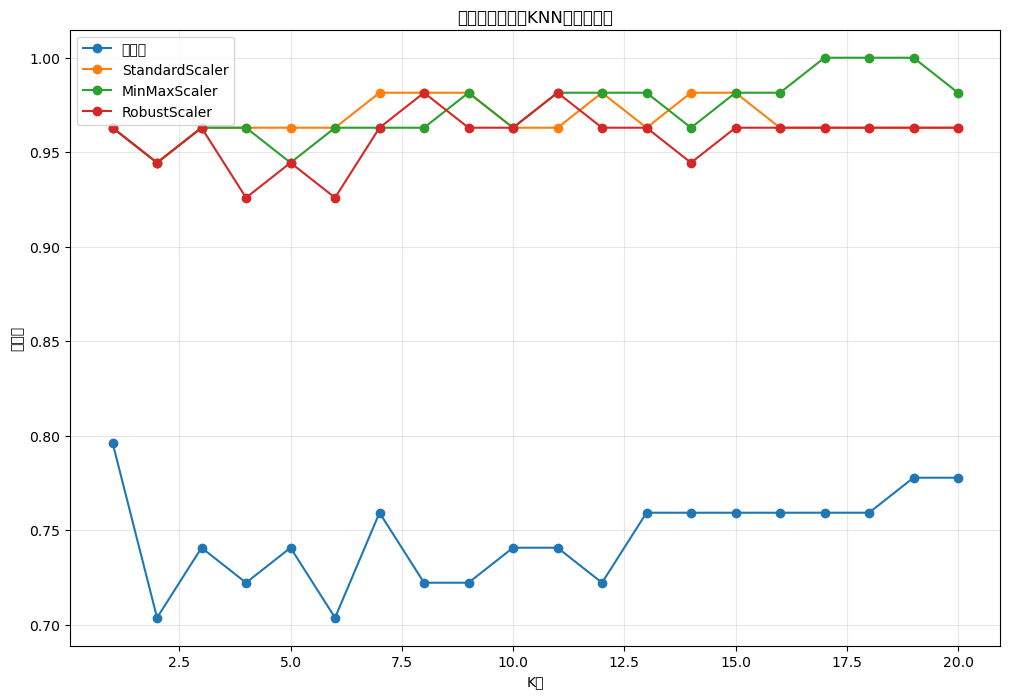


各缩放方法的最佳结果：
             缩放方法  最佳K值     最佳准确率
2    MinMaxScaler    17  1.000000
1  StandardScaler     7  0.981481
3    RobustScaler     8  0.981481
0             无缩放     1  0.796296


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 准备不同的缩放方法
scalers = {
    '无缩放': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# 测试不同K值下的性能
k_values = range(1, 21)
results = {name: [] for name in scalers.keys()}

for k in k_values:
    for scaler_name, scaler in scalers.items():
        if scaler is None:
            # 不进行缩放
            X_train_scaled = X_train
            X_test_scaled = X_test
        else:
            # 应用缩放
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        
        # 训练KNN
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        
        # 评估
        accuracy = knn.score(X_test_scaled, y_test)
        results[scaler_name].append(accuracy)

# 可视化结果
plt.figure(figsize=(12, 8))
for scaler_name, scores in results.items():
    plt.plot(k_values, scores, marker='o', label=scaler_name)

plt.xlabel('K值')
plt.ylabel('准确率')
plt.title('不同缩放方法对KNN性能的影响')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 找出最佳组合
best_results = []
for scaler_name, scores in results.items():
    best_k = k_values[np.argmax(scores)]
    best_score = max(scores)
    best_results.append({
        '缩放方法': scaler_name,
        '最佳K值': best_k,
        '最佳准确率': best_score
    })

best_df = pd.DataFrame(best_results)
print("\n各缩放方法的最佳结果：")
print(best_df.sort_values('最佳准确率', ascending=False))

## 第2课：特征编码

### 2.1 为什么需要特征编码？

机器学习算法通常只能处理数值数据，而实际数据中经常包含类别特征（如性别、颜色、城市等）。特征编码就是将这些类别特征转换为数值的过程。

### 2.2 创建示例数据集

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# 创建一个包含不同类型特征的数据集
data = pd.DataFrame({
    'Age': [22, 35, 58, 10, 28, 45, 33, 41],
    'Salary': [35000, 65000, 120000, 0, 45000, 85000, 70000, 95000],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'City': ['NYC', 'Paris', 'NYC', 'London', 'Paris', 'London', 'NYC', 'Paris'],
    'Education': ['Bachelor', 'Master', 'PhD', 'High School', 'Bachelor', 'Master', 'PhD', 'Master'],
    'Experience': ['Junior', 'Senior', 'Expert', 'Intern', 'Junior', 'Senior', 'Expert', 'Senior']
})

print("原始数据：")
print(data)
print("\n数据类型：")
print(data.dtypes)

原始数据：
   Age  Salary  Gender    City    Education Experience
0   22   35000    Male     NYC     Bachelor     Junior
1   35   65000  Female   Paris       Master     Senior
2   58  120000  Female     NYC          PhD     Expert
3   10       0    Male  London  High School     Intern
4   28   45000  Female   Paris     Bachelor     Junior
5   45   85000    Male  London       Master     Senior
6   33   70000  Female     NYC          PhD     Expert
7   41   95000    Male   Paris       Master     Senior

数据类型：
Age            int64
Salary         int64
Gender        object
City          object
Education     object
Experience    object
dtype: object


### 2.3 LabelEncoder（标签编码）

适用于有序类别特征或目标变量。

In [27]:
# LabelEncoder示例
le = LabelEncoder()

# 对性别进行编码（二分类）
data['Gender_Encoded'] = le.fit_transform(data['Gender'])

print("\nLabelEncoder编码结果（Gender）：")
print(data[['Gender', 'Gender_Encoded']])
print(f"\n编码映射: {dict(zip(le.classes_, range(len(le.classes_))))}")

# 对有序类别进行编码
# 注意：LabelEncoder不保证顺序，对于有序类别最好使用OrdinalEncoder
le_exp = LabelEncoder()
data['Experience_Encoded'] = le_exp.fit_transform(data['Experience'])

print("\nLabelEncoder编码结果（Experience）：")
print(data[['Experience', 'Experience_Encoded']])

# 警告：LabelEncoder的问题
print("\n⚠️ 注意：LabelEncoder可能会引入不存在的大小关系！")
print("例如：城市编码后 NYC=1, Paris=2 并不意味着 Paris > NYC")


LabelEncoder编码结果（Gender）：
   Gender  Gender_Encoded
0    Male               1
1  Female               0
2  Female               0
3    Male               1
4  Female               0
5    Male               1
6  Female               0
7    Male               1

编码映射: {'Female': 0, 'Male': 1}

LabelEncoder编码结果（Experience）：
  Experience  Experience_Encoded
0     Junior                   2
1     Senior                   3
2     Expert                   0
3     Intern                   1
4     Junior                   2
5     Senior                   3
6     Expert                   0
7     Senior                   3

⚠️ 注意：LabelEncoder可能会引入不存在的大小关系！
例如：城市编码后 NYC=1, Paris=2 并不意味着 Paris > NYC


2.4 OrdinalEncoder（序数编码）
适用于有明确顺序的类别特征。

In [7]:
# OrdinalEncoder - 可以指定顺序
from sklearn.preprocessing import OrdinalEncoder

# 定义教育水平的顺序
education_order = [['High School', 'Bachelor', 'Master', 'PhD']]
experience_order = [['Intern', 'Junior', 'Senior', 'Expert']]

# 创建编码器
ordinal_encoder_edu = OrdinalEncoder(categories=education_order)
ordinal_encoder_exp = OrdinalEncoder(categories=experience_order)

# 应用编码
data['Education_Ordinal'] = ordinal_encoder_edu.fit_transform(data[['Education']])
data['Experience_Ordinal'] = ordinal_encoder_exp.fit_transform(data[['Experience']])

print("\nOrdinalEncoder编码结果：")
print(data[['Education', 'Education_Ordinal', 'Experience', 'Experience_Ordinal']])
print("\n注意：编码保持了原有的大小关系！")


OrdinalEncoder编码结果：
     Education  Education_Ordinal Experience  Experience_Ordinal
0     Bachelor                1.0     Junior                 1.0
1       Master                2.0     Senior                 2.0
2          PhD                3.0     Expert                 3.0
3  High School                0.0     Intern                 0.0
4     Bachelor                1.0     Junior                 1.0
5       Master                2.0     Senior                 2.0
6          PhD                3.0     Expert                 3.0
7       Master                2.0     Senior                 2.0

注意：编码保持了原有的大小关系！


### 2.5 OneHotEncoder（独热编码）

适用于无序类别特征。

In [8]:
# OneHotEncoder示例
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first'避免多重共线性

# 对城市进行独热编码
city_encoded = ohe.fit_transform(data[['City']])
city_columns = [f'City_{cat}' for cat in ohe.categories_[0][1:]]  # 因为drop了第一个

# 创建DataFrame
city_df = pd.DataFrame(city_encoded, columns=city_columns)

# 合并到原数据
data_with_ohe = pd.concat([data, city_df], axis=1)

print("\nOneHotEncoder编码结果（City）：")
print(data_with_ohe[['City'] + city_columns])

# 使用get_dummies（更简便的方法）
data_dummies = pd.get_dummies(data, columns=['City', 'Gender'], drop_first=True)
print("\n使用pd.get_dummies的结果：")
print(data_dummies.columns.tolist())


OneHotEncoder编码结果（City）：
     City  City_NYC  City_Paris
0     NYC       1.0         0.0
1   Paris       0.0         1.0
2     NYC       1.0         0.0
3  London       0.0         0.0
4   Paris       0.0         1.0
5  London       0.0         0.0
6     NYC       1.0         0.0
7   Paris       0.0         1.0

使用pd.get_dummies的结果：
['Age', 'Salary', 'Education', 'Experience', 'Gender_Encoded', 'Experience_Encoded', 'Education_Ordinal', 'Experience_Ordinal', 'City_NYC', 'City_Paris', 'Gender_Male']


2.6 高级编码技术：目标编码（Target Encoding）

In [9]:
# 目标编码示例（也称为均值编码）
# 创建一个简单的示例
sales_data = pd.DataFrame({
    'Store': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'C', 'A'],
    'Product': ['X', 'Y', 'X', 'Z', 'X', 'Y', 'Z', 'Y', 'X', 'Z'],
    'Sales': [100, 150, 120, 80, 140, 110, 85, 160, 130, 90]
})

# 计算每个店铺的平均销售额
store_mean = sales_data.groupby('Store')['Sales'].mean()
print("店铺平均销售额：")
print(store_mean)

# 应用目标编码
sales_data['Store_TargetEncoded'] = sales_data['Store'].map(store_mean)
print("\n目标编码结果：")
print(sales_data)

# 警告：目标编码可能导致过拟合！
print("\n⚠️ 注意：目标编码应该在交叉验证中使用，避免数据泄露！")

店铺平均销售额：
Store
A    105.000000
B    150.000000
C     98.333333
Name: Sales, dtype: float64

目标编码结果：
  Store Product  Sales  Store_TargetEncoded
0     A       X    100           105.000000
1     B       Y    150           150.000000
2     A       X    120           105.000000
3     C       Z     80            98.333333
4     B       X    140           150.000000
5     A       Y    110           105.000000
6     C       Z     85            98.333333
7     B       Y    160           150.000000
8     C       X    130            98.333333
9     A       Z     90           105.000000

⚠️ 注意：目标编码应该在交叉验证中使用，避免数据泄露！


2.7 处理混合数据类型

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 使用sklearn的数据集
from sklearn.datasets import fetch_openml

# 加载泰坦尼克数据集的简化版本
# 创建示例数据
titanic_data = pd.DataFrame({
    'Age': [22, 35, np.nan, 10, 28, 45, 33, 41],
    'Fare': [7.25, 71.28, 26.55, 16.70, 13.00, 52.00, 8.05, 31.00],
    'Sex': ['male', 'female', 'female', 'male', 'female', 'male', 'female', 'male'],
    'Embarked': ['S', 'C', 'S', 'C', 'Q', 'S', 'C', 'Q'],
    'Pclass': [3, 1, 1, 2, 3, 1, 3, 2],
    'Survived': [0, 1, 1, 1, 0, 1, 0, 1]
})

print("泰坦尼克数据集示例：")
print(titanic_data.head())

# 分离特征和目标
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# 定义数值和类别特征
numeric_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass']

# 创建预处理管道
from sklearn.impute import SimpleImputer

# 数值特征处理
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 类别特征处理
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# 组合预处理
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 应用预处理
X_processed = preprocessor.fit_transform(X)

# 获取特征名称
cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
feature_names = numeric_features + list(cat_features)

# 创建处理后的DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)
print("\n预处理后的数据：")
print(X_processed_df.head())
print(f"\n原始特征数: {X.shape[1]}")
print(f"处理后特征数: {X_processed.shape[1]}")

泰坦尼克数据集示例：
    Age   Fare     Sex Embarked  Pclass  Survived
0  22.0   7.25    male        S       3         0
1  35.0  71.28  female        C       1         1
2   NaN  26.55  female        S       1         1
3  10.0  16.70    male        C       2         1
4  28.0  13.00  female        Q       3         0

预处理后的数据：
        Age      Fare  Sex_male  Embarked_Q  Embarked_S  Pclass_2  Pclass_3
0 -0.860559 -0.983351       1.0         0.0         1.0       0.0       1.0
1  0.399978  2.017970       0.0         0.0         0.0       0.0       0.0
2  0.206049 -0.078689       0.0         0.0         1.0       0.0       0.0
3 -2.024131 -0.540395       1.0         0.0         0.0       1.0       0.0
4 -0.278773 -0.713827       0.0         1.0         0.0       0.0       1.0

原始特征数: 5
处理后特征数: 7


## 第3课：特征选择

### 3.1 为什么需要特征选择？

1. **减少过拟合**：去除无关特征可以降低模型复杂度
2. **提高性能**：更少的特征意味着更快的训练和预测
3. **增强可解释性**：更容易理解哪些特征真正重要
4. **处理维度诅咒**：在高维空间中，许多算法性能下降

### 3.2 过滤法（Filter Methods）

#### 3.2.1 方差阈值

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/72940101.py:25: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/72940101.py:25: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/72940101.py:25: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/72940101.py:25: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/72940101.py:25: UserWarning: Glyph 20083 (\N{CJK UNIFIED IDEOGRAPH-4E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d

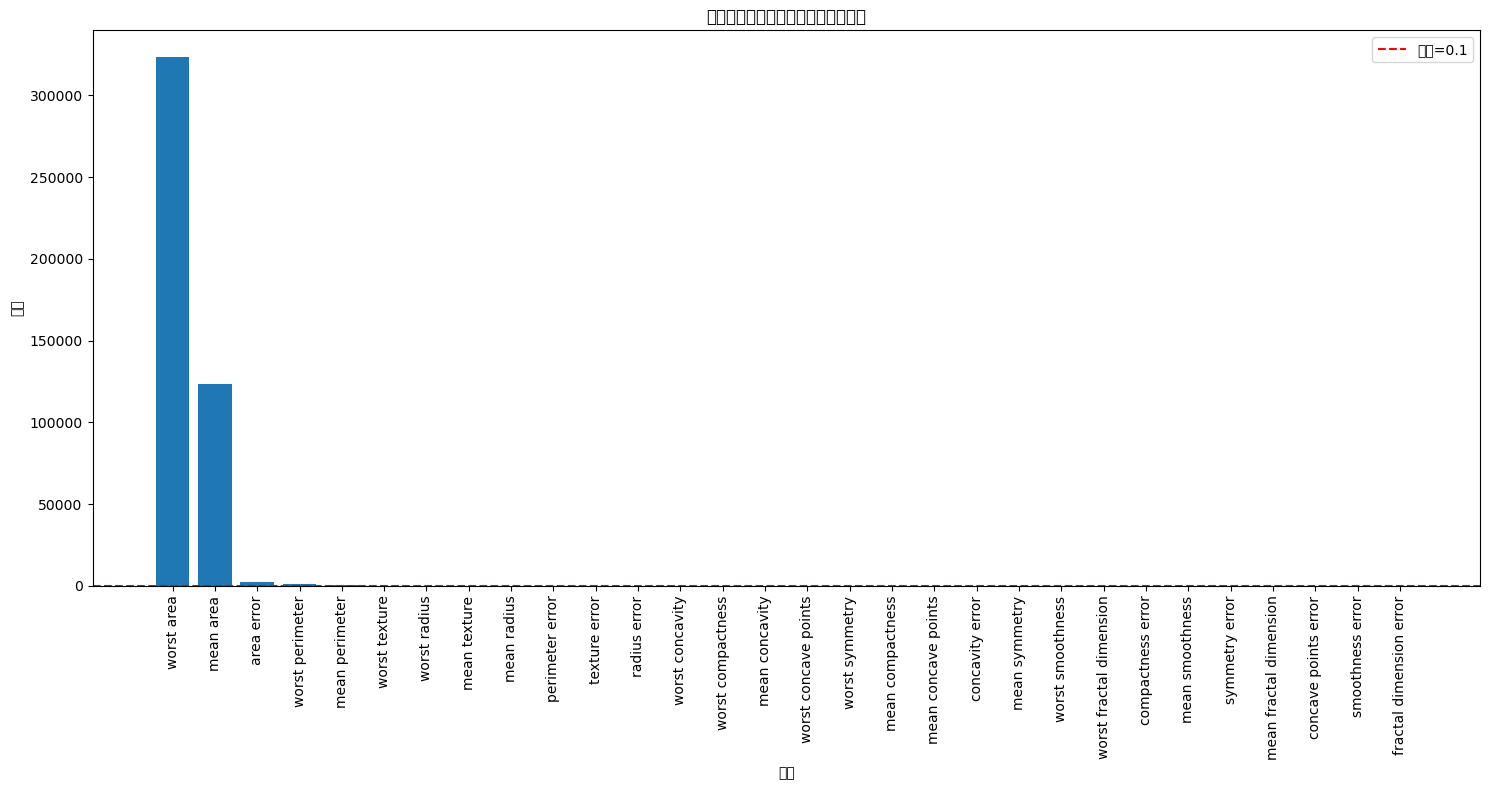

原始特征数: 30
选择后特征数: 11

被移除的特征 (19个):
  - mean smoothness: 方差=0.0002
  - mean compactness: 方差=0.0028
  - mean concavity: 方差=0.0063
  - mean concave points: 方差=0.0015
  - mean symmetry: 方差=0.0008
  - mean fractal dimension: 方差=0.0000
  - radius error: 方差=0.0768
  - smoothness error: 方差=0.0000
  - compactness error: 方差=0.0003
  - concavity error: 方差=0.0009
  - concave points error: 方差=0.0000
  - symmetry error: 方差=0.0001
  - fractal dimension error: 方差=0.0000
  - worst smoothness: 方差=0.0005
  - worst compactness: 方差=0.0247
  - worst concavity: 方差=0.0434
  - worst concave points: 方差=0.0043
  - worst symmetry: 方差=0.0038
  - worst fractal dimension: 方差=0.0003


In [30]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

# 加载乳腺癌数据集
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names

# 计算每个特征的方差
variances = X.var(axis=0)

# 可视化特征方差
plt.figure(figsize=(15, 8))
indices = np.argsort(variances)[::-1]
plt.bar(range(len(variances)), variances[indices])
plt.xticks(range(len(variances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('特征')
plt.ylabel('方差')
plt.title('乳腺癌数据集特征方差（降序排列）')
plt.axhline(y=0.1, color='r', linestyle='--', label='阈值=0.1')
plt.legend()
plt.tight_layout()
plt.show()

# 使用方差阈值选择特征
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)

# 获取被选择和被移除的特征
selected_features = [feature_names[i] for i in range(len(feature_names)) if selector.get_support()[i]]
removed_features = [feature_names[i] for i in range(len(feature_names)) if not selector.get_support()[i]]

print(f"原始特征数: {X.shape[1]}")
print(f"选择后特征数: {X_selected.shape[1]}")
print(f"\n被移除的特征 ({len(removed_features)}个):")
for feature in removed_features:
    idx = list(feature_names).index(feature)
    print(f"  - {feature}: 方差={variances[idx]:.4f}")

3.2.2 相关系数法

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/374258269.py:21: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/374258269.py:21: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/374258269.py:21: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/374258269.py:21: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/374258269.py:21: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p

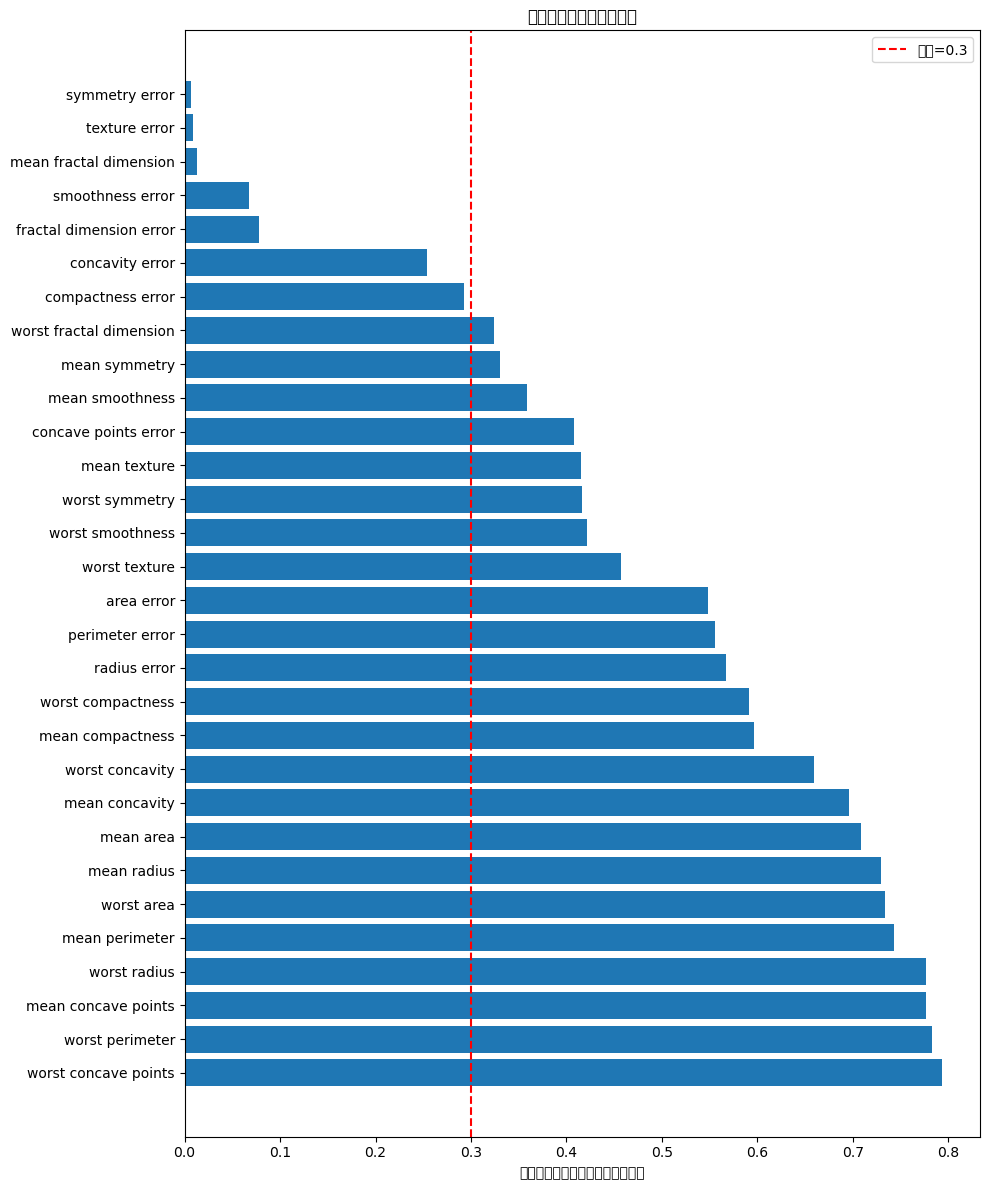


相关系数大于0.3的特征 (23个):
  - worst concave points: 0.794
  - worst perimeter: 0.783
  - mean concave points: 0.777
  - worst radius: 0.776
  - mean perimeter: 0.743
  - worst area: 0.734
  - mean radius: 0.730
  - mean area: 0.709
  - mean concavity: 0.696
  - worst concavity: 0.660


In [12]:
# 计算特征与目标变量的相关系数
correlations = []
for i in range(X.shape[1]):
    corr = np.corrcoef(X[:, i], y)[0, 1]
    correlations.append(abs(corr))

# 创建相关系数DataFrame
corr_df = pd.DataFrame({
    'Feature': feature_names,
    'Correlation': correlations
}).sort_values('Correlation', ascending=False)

# 可视化
plt.figure(figsize=(10, 12))
plt.barh(range(len(corr_df)), corr_df['Correlation'])
plt.yticks(range(len(corr_df)), corr_df['Feature'])
plt.xlabel('与目标变量的相关系数（绝对值）')
plt.title('特征重要性：相关系数法')
plt.axvline(x=0.3, color='r', linestyle='--', label='阈值=0.3')
plt.legend()
plt.tight_layout()
plt.show()

# 选择相关系数大于阈值的特征
threshold = 0.3
selected_by_corr = corr_df[corr_df['Correlation'] > threshold]['Feature'].tolist()
print(f"\n相关系数大于{threshold}的特征 ({len(selected_by_corr)}个):")
for feature in selected_by_corr[:10]:  # 显示前10个
    print(f"  - {feature}: {corr_df[corr_df['Feature']==feature]['Correlation'].values[0]:.3f}")

3.2.3 卡方检验

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/1092051335.py:24: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/1092051335.py:24: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/1092051335.py:24: UserWarning: Glyph 21345 (\N{CJK UNIFIED IDEOGRAPH-5361}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/1092051335.py:24: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/1092051335.py:24: UserWarning: Glyph 32479 (\N{CJK UNIFIED IDEOGRAPH-7EDF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7

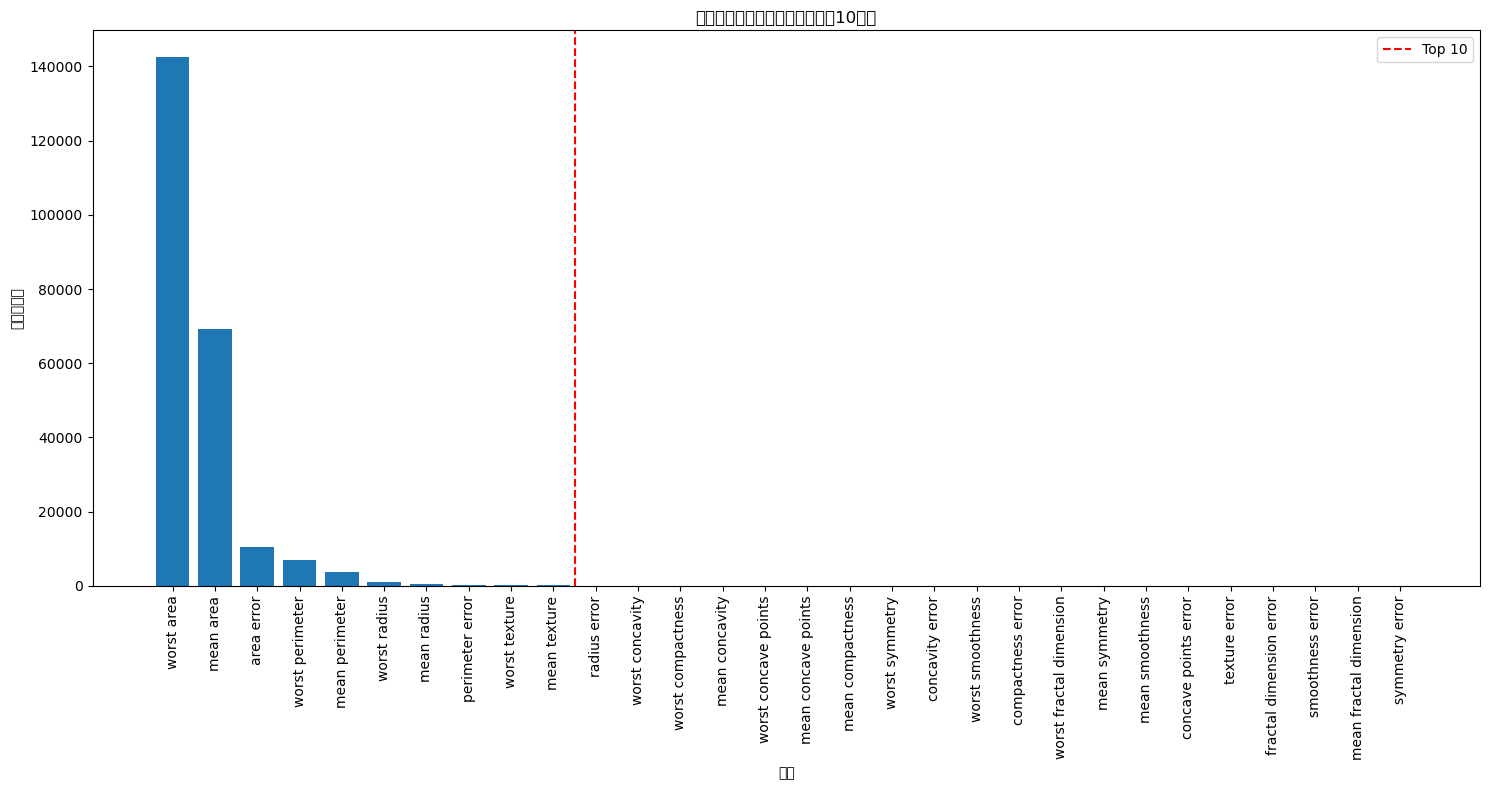


卡方检验选择的前10个特征:
1. mean radius: χ² = 526.05
2. mean texture: χ² = 189.07
3. mean perimeter: χ² = 3839.00
4. mean area: χ² = 69142.16
5. perimeter error: χ² = 340.51
6. area error: χ² = 10535.01
7. worst radius: χ² = 959.25
8. worst texture: χ² = 327.99
9. worst perimeter: χ² = 6914.82
10. worst area: χ² = 142586.55


In [31]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

# 确保所有特征都是非负的（卡方检验要求）
X_positive = X - X.min(axis=0)

# 使用卡方检验选择K个最佳特征
k = 10
chi2_selector = SelectKBest(chi2, k=k)
X_chi2 = chi2_selector.fit_transform(X_positive, y)

# 获取卡方统计量
chi2_scores = chi2_selector.scores_

# 可视化卡方得分
plt.figure(figsize=(15, 8))
indices = np.argsort(chi2_scores)[::-1]
plt.bar(range(len(chi2_scores)), chi2_scores[indices])
plt.xticks(range(len(chi2_scores)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('特征')
plt.ylabel('卡方统计量')
plt.title(f'特征重要性：卡方检验（选择前{k}个）')
plt.axvline(x=k-0.5, color='r', linestyle='--', label=f'Top {k}')
plt.legend()
plt.tight_layout()
plt.show()

# 打印选择的特征
selected_features_chi2 = [feature_names[i] for i in chi2_selector.get_support(indices=True)]
print(f"\n卡方检验选择的前{k}个特征:")
for i, feature in enumerate(selected_features_chi2, 1):
    score_idx = list(feature_names).index(feature)
    print(f"{i}. {feature}: χ² = {chi2_scores[score_idx]:.2f}")

3.3 互信息（Mutual Information）

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/811871170.py:16: UserWarning: Glyph 20114 (\N{CJK UNIFIED IDEOGRAPH-4E92}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/811871170.py:16: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/811871170.py:16: UserWarning: Glyph 24687 (\N{CJK UNIFIED IDEOGRAPH-606F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/811871170.py:16: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/811871170.py:16: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p

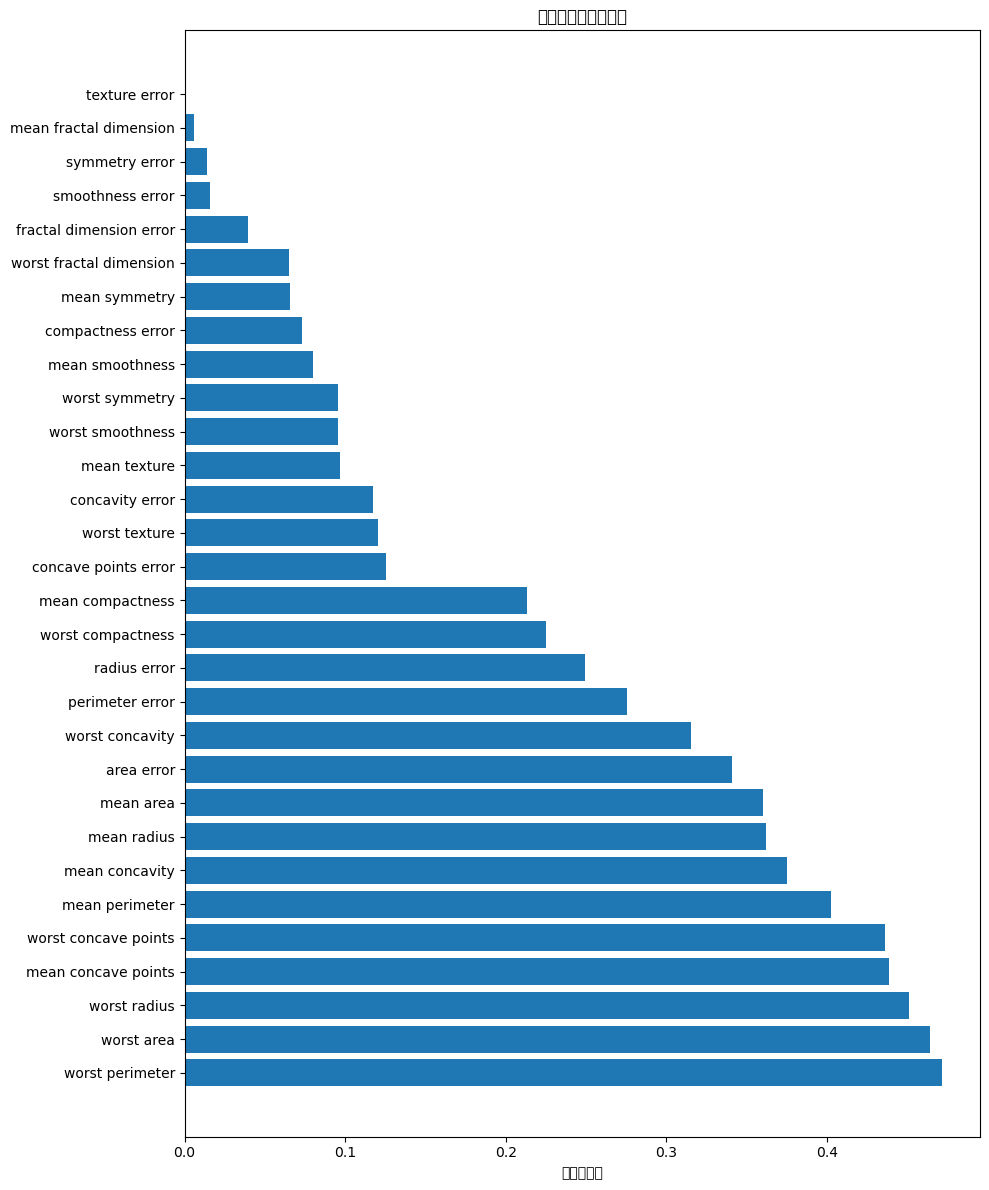


互信息得分前10的特征:
                 Feature  MI Score
22       worst perimeter  0.471842
23            worst area  0.464313
20          worst radius  0.451230
7    mean concave points  0.438806
27  worst concave points  0.436255
2         mean perimeter  0.402361
6         mean concavity  0.375447
0            mean radius  0.362276
3              mean area  0.360023
13            area error  0.340759


In [32]:
# 计算互信息
mi_scores = mutual_info_classif(X, y, random_state=42)

# 创建互信息DataFrame
mi_df = pd.DataFrame({
    'Feature': feature_names,
    'MI Score': mi_scores
}).sort_values('MI Score', ascending=False)

# 可视化互信息得分
plt.figure(figsize=(10, 12))
plt.barh(range(len(mi_df)), mi_df['MI Score'])
plt.yticks(range(len(mi_df)), mi_df['Feature'])
plt.xlabel('互信息得分')
plt.title('特征重要性：互信息')
plt.tight_layout()
plt.show()

print("\n互信息得分前10的特征:")
print(mi_df.head(10))

3.4 包装法：递归特征消除（RFE）

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

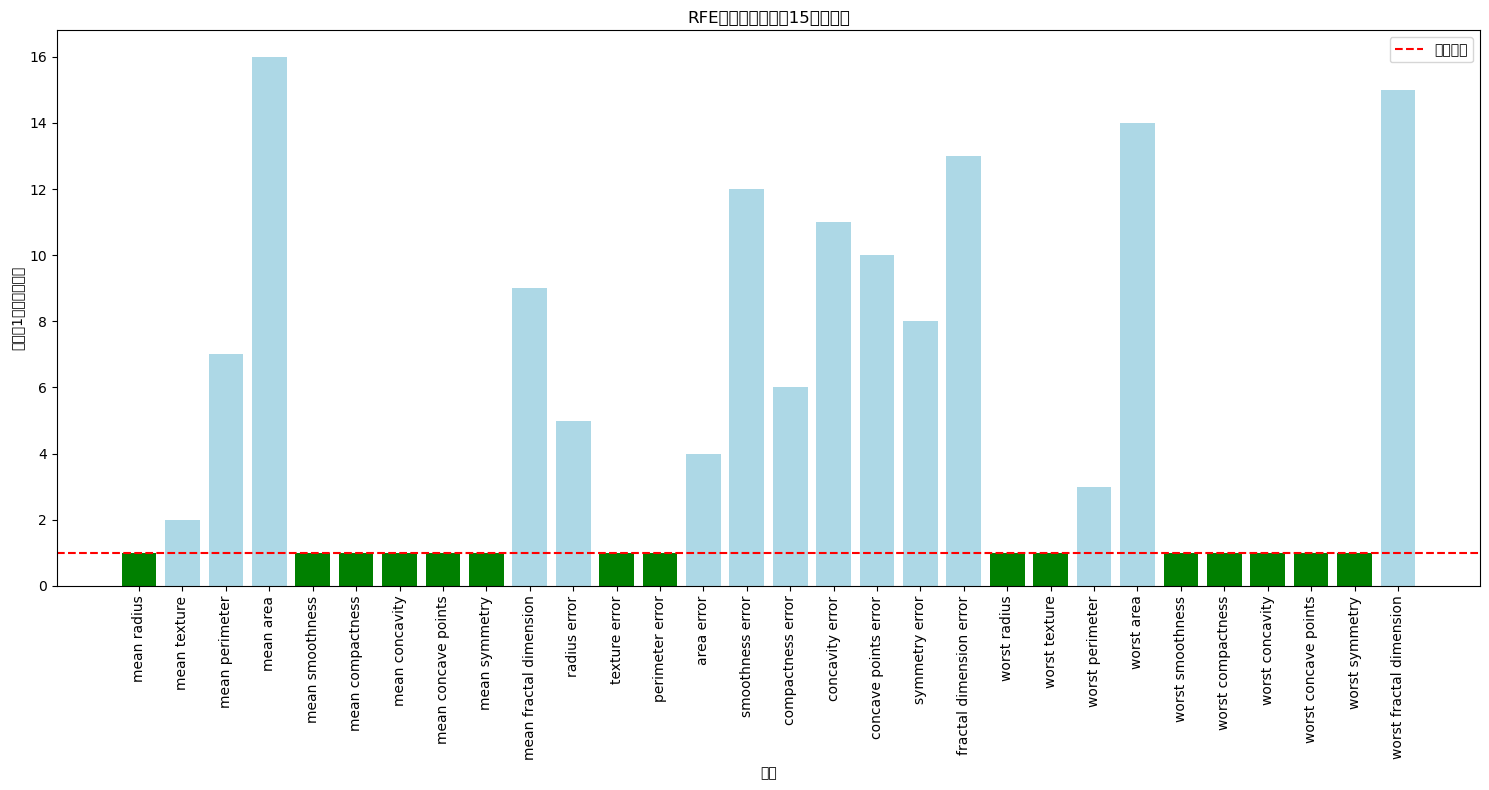


RFE选择的15个特征:
1. mean radius
2. mean smoothness
3. mean compactness
4. mean concavity
5. mean concave points
6. mean symmetry
7. texture error
8. perimeter error
9. worst radius
10. worst texture
11. worst smoothness
12. worst compactness
13. worst concavity
14. worst concave points
15. worst symmetry


In [33]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# 使用逻辑回归作为基础模型
estimator = LogisticRegression(random_state=42, max_iter=1000)

# RFE选择15个特征
n_features = 15
rfe = RFE(estimator, n_features_to_select=n_features, step=1)
rfe.fit(X, y)

# 获取选择的特征
selected_features_rfe = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
feature_ranking = rfe.ranking_

# 可视化特征排名
plt.figure(figsize=(15, 8))
colors = ['green' if rank == 1 else 'lightblue' for rank in feature_ranking]
plt.bar(range(len(feature_ranking)), feature_ranking, color=colors)
plt.xticks(range(len(feature_ranking)), feature_names, rotation=90)
plt.xlabel('特征')
plt.ylabel('排名（1表示被选中）')
plt.title(f'RFE特征排名（选择{n_features}个特征）')
plt.axhline(y=1, color='r', linestyle='--', label='选择阈值')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nRFE选择的{n_features}个特征:")
for i, feature in enumerate(selected_features_rfe, 1):
    print(f"{i}. {feature}")

3.5嵌入法：基于模型的特征选择

/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/3589396307.py:23: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/3589396307.py:23: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/3589396307.py:23: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/3589396307.py:23: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/3589396307.py:23: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7

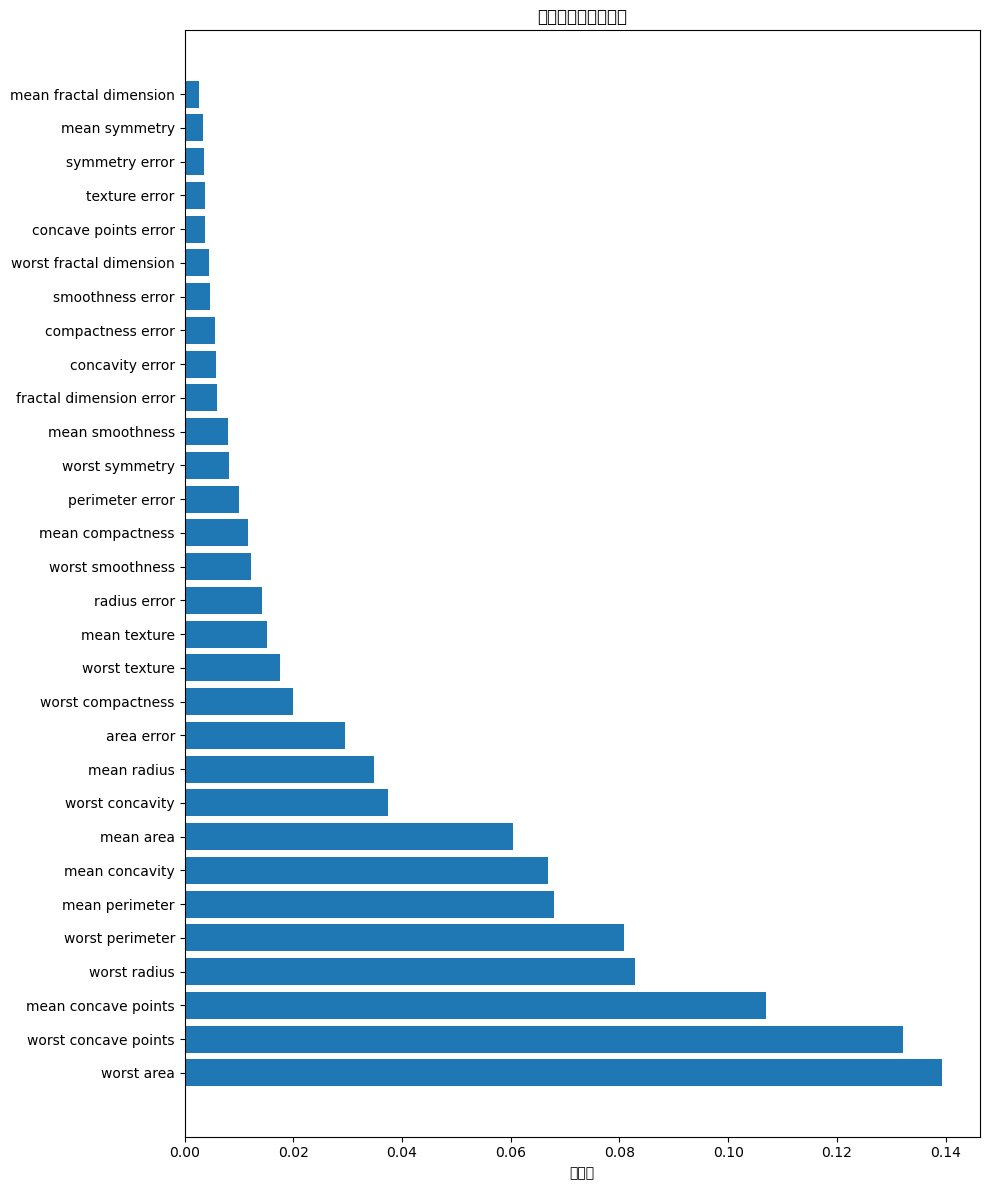


基于模型选择的特征数: 10
选择的特征:
  - mean radius: 0.0348
  - mean perimeter: 0.0680
  - mean area: 0.0605
  - mean concavity: 0.0669
  - mean concave points: 0.1070
  - worst radius: 0.0828
  - worst perimeter: 0.0808
  - worst area: 0.1394
  - worst concavity: 0.0373
  - worst concave points: 0.1322


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# 使用随机森林进行特征选择
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# 获取特征重要性
importances = rf.feature_importances_

# 创建特征重要性DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(10, 12))
plt.barh(range(len(importance_df)), importance_df['Importance'])
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.xlabel('重要性')
plt.title('随机森林特征重要性')
plt.tight_layout()
plt.show()

# 基于重要性选择特征
selector_model = SelectFromModel(rf, prefit=True)
X_selected_model = selector_model.transform(X)

print(f"\n基于模型选择的特征数: {X_selected_model.shape[1]}")
print("选择的特征:")
for feature in feature_names[selector_model.get_support()]:
    importance = importance_df[importance_df['Feature'] == feature]['Importance'].values[0]
    print(f"  - {feature}: {importance:.4f}")

3.6特征选择方法比较


特征选择方法比较:
           方法  特征数     平均准确率       标准差
0        全部特征   30  0.980686  0.006539
1        方差阈值   30  0.980686  0.006539
4    RFE(15个)   15  0.971914  0.010200
5      基于RF模型   10  0.947291  0.023509
2  F统计量(K=15)   15  0.945552  0.025010
3   互信息(K=15)   15  0.945552  0.025010
6  卡方检验(K=15)   15  0.945552  0.025010


/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/2185932021.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(results_df['方法'], rotation=45, ha='right')
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/2185932021.py:110: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/2185932021.py:110: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/2185932021.py:110: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qc/bfncn21d7s3g1p6vh0d5vlyc0000gn/T/ipykernel_5015/2185932021.py:110: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F8

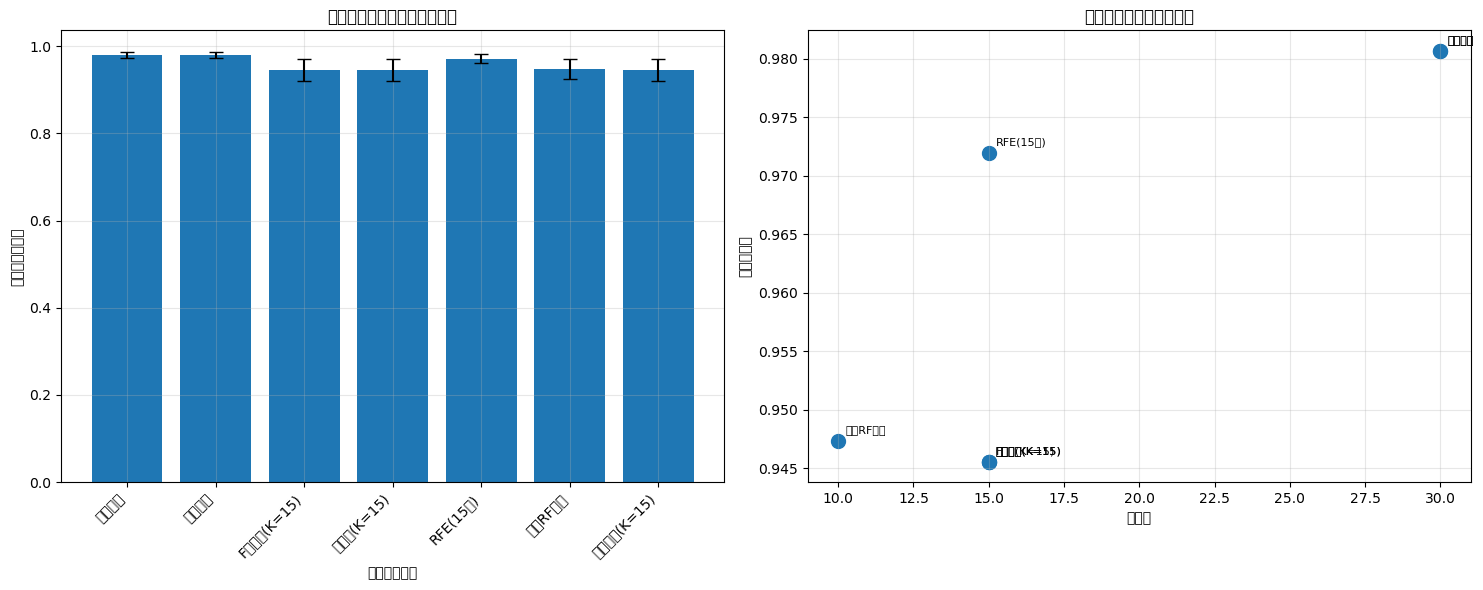

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# 准备不同的特征选择方法
# 注意：卡方检验需要非负输入，所以需要特殊处理
feature_selectors = {
    '全部特征': None,
    '方差阈值': VarianceThreshold(threshold=0.1),
    'F统计量(K=15)': SelectKBest(f_classif, k=15),
    '互信息(K=15)': SelectKBest(mutual_info_classif, k=15),
    'RFE(15个)': RFE(LogisticRegression(max_iter=1000), n_features_to_select=15),
    '基于RF模型': SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
}

# 使用逻辑回归评估不同特征选择方法
results = []

for name, selector in feature_selectors.items():
    try:
        if selector is None:
            # 使用全部特征
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=1000, random_state=42))
            ])
        else:
            # 使用特征选择
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('selector', selector),
                ('classifier', LogisticRegression(max_iter=1000, random_state=42))
            ])
        
        # 交叉验证
        scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
        
        # 获取特征数
        if selector is None:
            n_features = X.shape[1]
        else:
            if name == '基于RF模型':
                # 对于基于模型的选择器，需要先fit
                temp_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
                temp_selector.fit(X, y)
                n_features = temp_selector.transform(X).shape[1]
            elif 'K=15' in name or '15个' in name:
                n_features = 15
            else:
                n_features = X.shape[1]
        
        results.append({
            '方法': name,
            '特征数': n_features,
            '平均准确率': scores.mean(),
            '标准差': scores.std()
        })
        
    except Exception as e:
        print(f"方法 {name} 出错: {str(e)}")
        continue

# 单独处理卡方检验（需要非负数据）
try:
    # 为卡方检验创建特殊的pipeline
    chi2_pipeline = Pipeline([
        ('minmax', MinMaxScaler()),  # 使用MinMaxScaler确保数据非负
        ('selector', SelectKBest(chi2, k=15)),
        ('scaler', StandardScaler()),  # 选择后再标准化
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    
    scores = cross_val_score(chi2_pipeline, X, y, cv=5, scoring='accuracy')
    
    results.append({
        '方法': '卡方检验(K=15)',
        '特征数': 15,
        '平均准确率': scores.mean(),
        '标准差': scores.std()
    })
except Exception as e:
    print(f"卡方检验出错: {str(e)}")

# 显示结果
results_df = pd.DataFrame(results)
print("\n特征选择方法比较:")
print(results_df.sort_values('平均准确率', ascending=False))

# 可视化比较
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 准确率比较
ax1.bar(results_df['方法'], results_df['平均准确率'], yerr=results_df['标准差'], capsize=5)
ax1.set_xlabel('特征选择方法')
ax1.set_ylabel('交叉验证准确率')
ax1.set_title('不同特征选择方法的性能比较')
ax1.set_xticklabels(results_df['方法'], rotation=45, ha='right')
ax1.grid(True, alpha=0.3)

# 特征数vs准确率
ax2.scatter(results_df['特征数'], results_df['平均准确率'], s=100)
for i, row in results_df.iterrows():
    ax2.annotate(row['方法'], (row['特征数'], row['平均准确率']), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)
ax2.set_xlabel('特征数')
ax2.set_ylabel('平均准确率')
ax2.set_title('特征数与模型性能的关系')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()